In [3]:
import pandas as pd
df=pd.read_csv("/Users/joiecheng/Downloads/fct_invoice.csv")
df

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [4]:
cf=pd.read_json("/Users/joiecheng/Downloads/dim_customer.json")
cf

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore
...,...,...,...,...,...
5186,NaN,Arthur,M,9428,Harris
5187,NaN,David,M,9494,Roy
5188,85.0,Thomas,M,10350,Turner
5189,NaN,April,F,10587,Sanchez


### Easy 1: How many unique customers are in the dataset?

### 5191 customers

In [8]:
df['customer_id'].nunique()

5191

### Easy 2: What are the different categories of products available? How many unique categories are there?

### 8 categories: clothing, shoes, books, cosmetics, food & beverage, toys, technology, souvenir

In [81]:
categories=df["category"]
unique_category=categories.unique()
print(unique_category)

['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']


### Easy 3: Which payment method is the most popular? How many times was it used?

### cash - 44447 times

In [82]:
df.groupby("payment_method").count()["invoice_no"]

payment_method
Cash           44447
Credit Card    34931
Debit Card     20079
Name: invoice_no, dtype: int64

### Medium 1: What are the three most popular categories, by total sales?

### 1. clothing 
### 2. shoes
### 3. technology

In [10]:
df["total_sales"]=df["quantity"]*df["price"]
df.groupby("category")["total_sales"].sum()

category
Books              8.345529e+05
Clothing           1.139968e+08
Cosmetics          6.792863e+06
Food & Beverage    8.495351e+05
Shoes              6.655345e+07
Souvenir           6.358247e+05
Technology         5.786235e+07
Toys               3.980426e+06
Name: total_sales, dtype: float64

In [26]:
df["total_sales"]

0         7502.00
1         5401.53
2          300.08
3        15004.25
4          242.40
           ...   
99452      293.25
99453       20.92
99454       20.92
99455    16800.00
99456      105.57
Name: total_sales, Length: 99457, dtype: float64

### Medium 2: What are the total sales attributed to customers over the age of 45?

### 82039768.15

In [32]:
invoice=pd.read_csv("/Users/joiecheng/Downloads/fct_invoice.csv")
customers=pd.read_json("/Users/joiecheng/Downloads/dim_customer.json")
merged_df=pd.merge(
    invoice,
    customers,
    how="inner",
    left_on="customer_id",
    right_on="id"
)

In [33]:
merged_df["sales"]=merged_df["price"]*merged_df["quantity"]
merged_df

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall,age,first_name,gender,id,last_name,sales
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,NaN,William,M,229,Anderson,7502.00
1,I126377,229,Cosmetics,2,81.32,Credit Card,5/4/2021,Metrocity,NaN,William,M,229,Anderson,162.64
2,I178419,229,Shoes,3,1800.51,Debit Card,1/6/2021,Istinye Park,NaN,William,M,229,Anderson,5401.53
3,I847727,229,Clothing,3,900.24,Credit Card,21/08/2022,Zorlu Center,NaN,William,M,229,Anderson,2700.72
4,I219251,229,Shoes,5,3000.85,Credit Card,23/06/2022,Istinye Park,NaN,William,M,229,Anderson,15004.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I198027,4973,Shoes,1,600.17,Cash,8/11/2021,Kanyon,NaN,Melissa,F,4973,Bell,600.17
99453,I989120,6161,Books,5,75.75,Cash,8/1/2021,Viaport Outlet,36.0,Leslie,F,6161,Bass,378.75
99454,I791963,6779,Clothing,5,1500.40,Credit Card,6/3/2021,Metropol AVM,NaN,Kelly,F,6779,Roberts,7502.00
99455,I100582,8386,Clothing,2,600.16,Cash,2/11/2021,Istinye Park,47.0,Shawn,M,8386,Perez,1200.32


In [34]:
sales_45=merged_df[merged_df["age"]>45]
sales_45["sales"].sum()

82039768.15

### Medium 3: How is the data distributed across different invoice dates? Are there any seasonal trends or patterns?

In [16]:
sorted_merged_df = merged_df.sort_values(by='invoice_date', ascending=True)
dated_invoice = sorted_merged_df['invoice_date'].value_counts().sort_index()
dated_invoice

1/1/2021     105
1/1/2022     101
1/1/2023     145
1/10/2021    132
1/10/2022    126
            ... 
9/7/2022     110
9/8/2021     135
9/8/2022     126
9/9/2021     136
9/9/2022     138
Name: invoice_date, Length: 797, dtype: int64

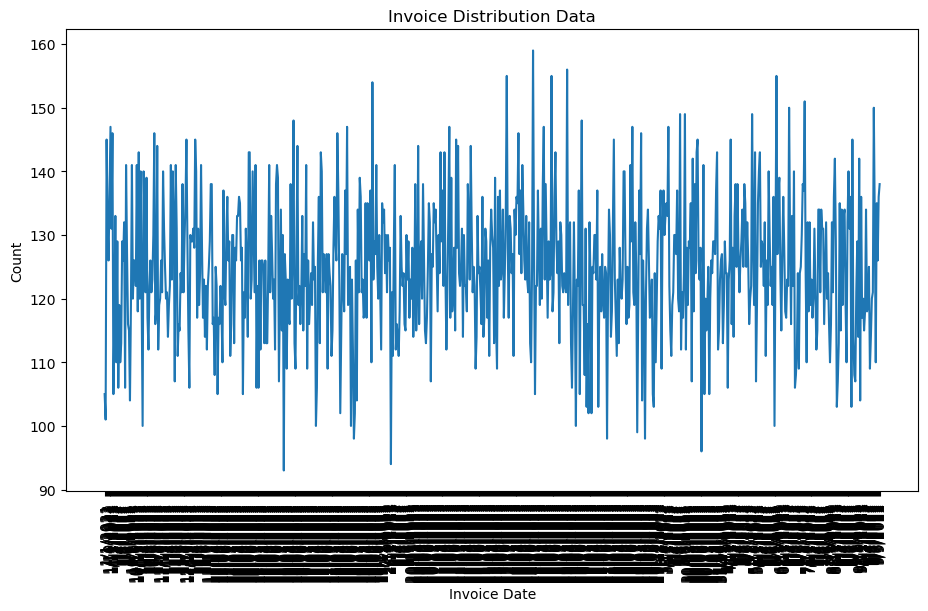

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(11,6))
plt.plot(dated_invoice.index,dated_invoice.values)
plt.xlabel("Invoice Date")
plt.ylabel("Count")
plt.title("Invoice Distribution Data")
plt.xticks(rotation=90, fontsize=10)
plt.show()

### Hard: Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

In [37]:
age_ranges=range(9,99,10) #ages 0-100
labels=['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']
merged_df["ages"]=pd.cut(merged_df["age"],bins=age_ranges,labels=labels)
pivot=merged_df.pivot_table(index="category",columns="ages",values="sales", aggfunc=sum)
pivot

ages,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89
category,,,,,,,,
Books,12801.75,79461.75,84143.10,87203.40,74962.20,80476.80,54827.85,26664.00
Clothing,1927413.84,10250732.80,11354126.96,11215189.92,10321851.76,10660642.08,7769371.28,4493698.00
Cosmetics,109619.36,605915.32,723544.70,665034.96,587780.96,649990.76,419082.62,254531.60
Food & Beverage,13582.31,73491.96,87246.86,89553.29,72425.04,80976.09,55050.98,31332.93
Shoes,993281.35,5924878.24,7200839.66,7025590.02,5852857.84,5978893.54,4480269.05,2628744.60
Souvenir,12375.15,54943.32,64092.72,66391.80,54943.32,55025.43,38673.81,23718.06
Technology,1129800.00,5261550.00,6159300.00,5954550.00,4435200.00,5471550.00,3638250.00,1946700.00
Toys,60426.24,385100.80,420582.40,390906.88,345067.52,363955.20,273244.16,153932.80
